In [79]:
import pandas as pd
import os
import csv
import sys
import numpy as np

import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Load Data

In [85]:
programa = 'L6N_20151024' #cambiar el programa
bert_or_orig = 'bert' #orig

sys.path.append('../')

#cur_path = os.path.dirname(__file__)
path = '../bert_data/data_to_visualize/' + programa + '-' + bert_or_orig + '_labels.csv'
#bert_output = os.path.relpath(path, cur_path)

df = pd.read_csv(path, header=None)

In [86]:
df

,0,1,2,3,4,5,6,7,8,9,...,185,186,187,188,189,190,191,192,193,194
0,#L6Ncasado,0,0,0.000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000,0,0.003
1,#L6Ncasado,0,0,0.000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000,0,1.000
2,#L6Ncasado,0,0,0.009,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.043,0,0.247
3,#L6Ncasado,0,0,0.009,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.039,0,0.224
4,#L6Ncasado,0,0,0.001,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.004,0,0.021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82878,#L6Ncasado,0,0,0.006,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.027,0,0.160
82879,#L6Ncasado,0,0,0.008,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.034,0,0.203
82880,#L6Ncasado,0,0,0.001,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.007,0,0.039
82881,#L6Ncasado,0,0,0.001,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.003,0,0.019


In [82]:
classes = df[0]
n_labels = df[0].nunique()
embeddings = df.drop(columns=0)

In [90]:
hashtags = df[0].unique()

array(['#L6Ncasado', '#L6Nbarómetro', '#L6Ncarmena'], dtype=object)

In [ ]:
def dic_hashtags(hashtags):
    dic = {}
    for i in hashtags:
        if i in 

In [ ]:
def color(x):
    

In [ ]:
df['topic'] = df[0].apply(lambda x: color(x))

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ['#L6Ncasado' '#L6Ncasado' '#L6Ncasado' ... '#L6Ncasado' '#L6Ncasado'
 '#L6Ncasado']

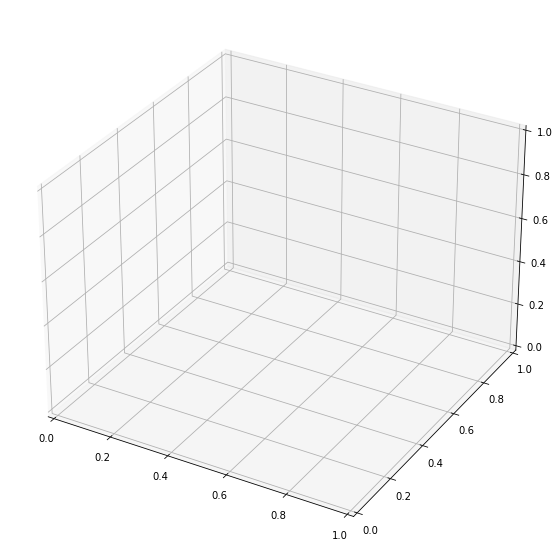

In [83]:
# Clústering con PCA
embeddings = df.drop(columns=0)
pca = PCA(n_components=3)
#pca_result = pca.fit_transform(df[feat_cols].values)
pca_result = pca.fit_transform(embeddings)

rndperm = np.random.permutation(df.shape[0])
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1]
df['pca-three'] = pca_result[:,2]
df['y'] = classes

n_labels = df['y'].nunique()

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"],
    ys=df.loc[rndperm,:]["pca-two"],
    zs=df.loc[rndperm,:]["pca-three"],
    c=df.loc[rndperm, :]["y"],
    cmap='tab10'
)

ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')

plt.legend()
plt.show()


In [69]:
df_pca = df[['pca-one', 'pca-two', 'pca-three', 'y']]

<AxesSubplot:xlabel='pca-one', ylabel='pca-three'>

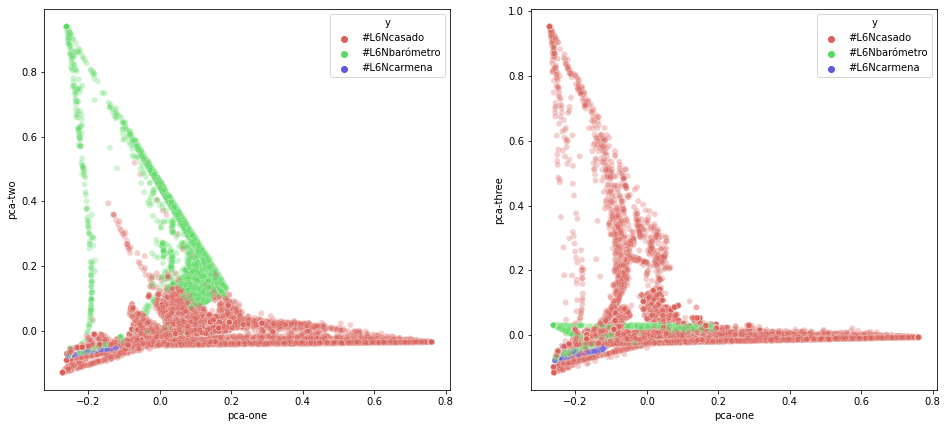

In [71]:
# new pic
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", n_labels),
    data=df_pca,
    legend="full",
    alpha=0.3,
    ax=ax1
)

ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="pca-one", y="pca-three",
    hue="y",
    palette=sns.color_palette("hls", n_labels),
    data=df_pca,
    legend="full",
    alpha=0.3,
    ax=ax2
)

# TSNE

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 82883 samples in 0.009s...
[t-SNE] Computed neighbors for 82883 samples in 136.451s...
[t-SNE] Computed conditional probabilities for sample 1000 / 82883
[t-SNE] Computed conditional probabilities for sample 2000 / 82883
[t-SNE] Computed conditional probabilities for sample 3000 / 82883
[t-SNE] Computed conditional probabilities for sample 4000 / 82883
[t-SNE] Computed conditional probabilities for sample 5000 / 82883
[t-SNE] Computed conditional probabilities for sample 6000 / 82883
[t-SNE] Computed conditional probabilities for sample 7000 / 82883
[t-SNE] Computed conditional probabilities for sample 8000 / 82883
[t-SNE] Computed conditional probabilities for sample 9000 / 82883
[t-SNE] Computed conditional probabilities for sample 10000 / 82883
[t-SNE] Computed conditional probabilities for sample 11000 / 82883
[t-SNE] Computed conditional probabilities for sample 12000 / 82883
[t-SNE] Computed conditional probabilities for 

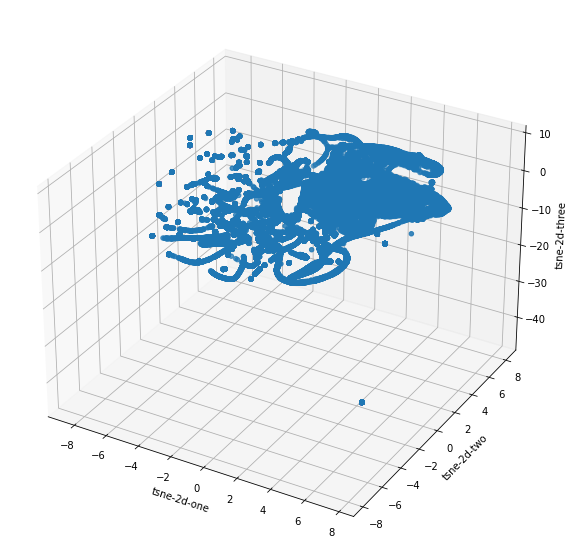

In [72]:
tsne = TSNE(n_components=3,
            verbose=1,
            perplexity=40,
            init="pca",
            n_iter=300)#300)
tsne_results = tsne.fit_transform(embeddings)

df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]
df['tsne-2d-three'] = tsne_results[:,2]

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["tsne-2d-one"],
    ys=df.loc[rndperm,:]["tsne-2d-two"],
    zs=df.loc[rndperm,:]["tsne-2d-three"],
    #c=df.loc[rndperm,:]["y"],
    cmap='tab10'
)

ax.set_xlabel('tsne-2d-one')
ax.set_ylabel('tsne-2d-two')
ax.set_zlabel('tsne-2d-three')

plt.show()

In [74]:
df_tsne = df[['tsne-2d-one', 'tsne-2d-two', 'tsne-2d-three', 'y']]

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-three'>

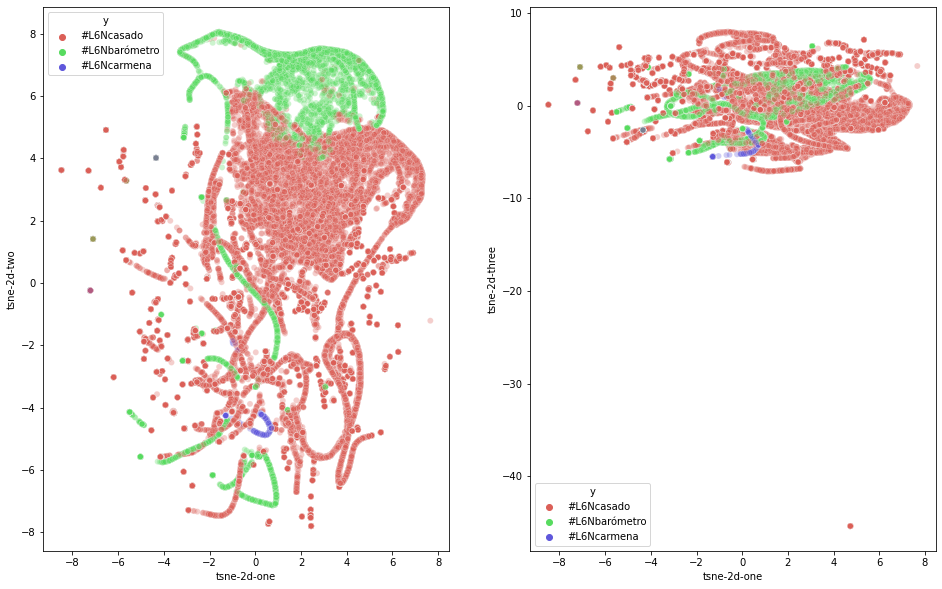

In [75]:
# new pic
plt.figure(figsize=(16,10))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", n_labels),
    data=df_tsne,
    legend="full",
    alpha=0.3,
    ax=ax1
)

ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-three",
    hue="y",
    palette=sns.color_palette("hls", n_labels),
    data=df_tsne,
    legend="full",
    alpha=0.3,
    ax=ax2
)

# UMAP

In [76]:
n_neighbors=15
#n_neighbors=5
#n_neighbors=50
n_components=3

umap_model = umap.UMAP(n_neighbors=n_neighbors,
                            n_components=n_components,
                            min_dist=0.0,
                            metric='cosine').fit(embeddings)

umap_embeddings = umap_model.transform(embeddings)
print("Reduced dimensionality with UMAP")

df['y'] = classes
df['UMAP-one'] = umap_embeddings[:,0]
df['UMAP-two'] = umap_embeddings[:,1]
df['UMAP-three'] = umap_embeddings[:,2]

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["UMAP-one"],
    ys=df.loc[rndperm,:]["UMAP-two"],
    zs=df.loc[rndperm,:]["UMAP-three"],
    #c=df.loc[rndperm,:]["y"],
    cmap='tab10'
)

ax.set_xlabel('UMAP-one')
ax.set_ylabel('UMAP-two')
ax.set_zlabel('UMAP-three')

NameError: name 'umap' is not defined